# nnll-fast

In [1]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.util as util
import matplotlib.pyplot as plt
from hepi.run import nnllfast as nnll
# set the folder where the resummino binary can be found either in either ./{,bin,bin/build}/resummino
nnll.set_path("nnll-fast-1.1")
# By default hepi will run with nice -n5 to prevent overloading the system if more scans than cores are running
#rs.set_pre("") disables any prefixing with nice
print (nnll.get_path())

0.2.10.6
/home/apn/git/nnll-fast/nnll-fast


Checking input:   0%|          | 0/16 [00:00<?, ?it/s]

Preparing:   0%|          | 0/16 [00:00<?, ?it/s]

Skipped: 0 Not skipped: 16


Running:   0%|          | 0/16 [00:00<?, ?it/s]

Parsing:   0%|          | 0/16 [00:00<?, ?it/s]

CPU times: user 494 ms, sys: 14.1 ms, total: 508 ms
Wall time: 614 ms


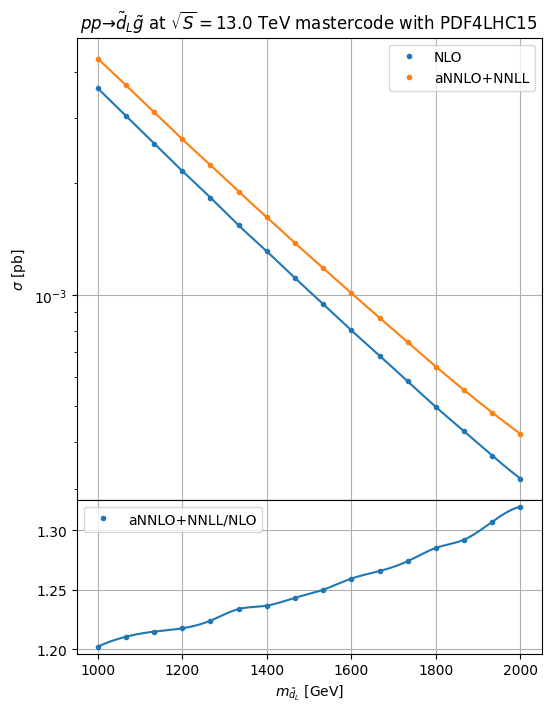

In [6]:
%%time
params = [
    "mastercode_with_gm2.in", # baseline slha file in the relative ./output folder by default unless set_output_dir was used 
]
pss = [    
      (1000001,1000021), # Final state particles for resummino to run
     ]

for pa,pb in pss:
    for param in params:
        # All the inputs Order, CMS in GeV, particle 1, particle 2, slha, pdf_lo, pdf_nlo,mu_f, mu_r
        i = hepi.Input(hepi.Order.aNNLO_PLUS_NNLL,13000,pa,pb,param,"PDF4LHC15","PDF4LHC15",1., 1.,id=1)
        li = [i] # li is our list of inputs that we want resummino to run
        li = hepi.mass_scan(li,pb, np.linspace(2000,2000,1)) 
        li = hepi.mass_scan(li,pa, np.linspace(1000,2000,16)) # we scan the slepton mass from 100 to 1000 at 15 equidistant points  
        rs_dl = nnll.run(li,skip=False,n_jobs=1) # run resummino, skipping if the result already exists.
        # rs_dl is a panda table(dataframe) with all inputs and result 
        _,axs = hepi.init_double_plot()
        # hepi has some useful plotting routines, but the results from rs_dl can easily be accessed
        # Now plot the mass of PDG id pa from the results at LO ,NLO and aNNLO+NLL
        hepi.mass_plot(rs_dl,["NLO","aNNLO_PLUS_NNLL"],pa,axes=axs[0],tight=False)
        # Plot K factors vs LO and aNNLO+NLL/NLO
        hepi.mass_plot(rs_dl,["aNNLO_PLUS_NNLL_OVER_NLO"],pa, yaxis=None, axes=axs[1],logy=False,tight=False)
        # construct a title from the inputs
        hepi.title(li[0],axs[0],scenario="mastercode")

In [3]:
rs_dl

,LO,NLO,NLO_PLUS_NLL,aNNLO_PLUS_NNLL,K_LO,K_NLO,K_NLO_PLUS_NLL,NLO_PLUS_NLL_OVER_NLO,K_aNNLO_PLUS_NNLL,aNNLO_PLUS_NNLL_OVER_NLO,...,id,model,mu,mass_1000021,mass_1000001,runner,nf_final_state_in,nf_squark_mass,nf_gluino_mass,nf_deg
0,None,0.00361+/-0,None,0.00434+/-0,None,None,None,None,None,1.2022160664819945+/-0,...,1,,1500.000000,2000.0,1000.000000,NLLfastRunner-?,sg,1000.000000,2000,10
1,None,0.00304+/-0,None,0.00368+/-0,None,None,None,None,None,1.2105263157894737+/-0,...,1,,1533.333333,2000.0,1066.666667,NLLfastRunner-?,sg,1066.666667,2000,10
2,None,0.00256+/-0,None,0.00311+/-0,None,None,None,None,None,1.2148437499999998+/-0,...,1,,1566.666667,2000.0,1133.333333,NLLfastRunner-?,sg,1133.333333,2000,10
3,None,0.00216+/-0,None,0.00263+/-0,None,None,None,None,None,1.2175925925925926+/-0,...,1,,1600.000000,2000.0,1200.000000,NLLfastRunner-?,sg,1200.000000,2000,10
4,None,0.00183+/-0,None,0.00224+/-0,None,None,None,None,None,1.2240437158469943+/-0,...,1,,1633.333333,2000.0,1266.666667,NLLfastRunner-?,sg,1266.666667,2000,10
5,None,0.0015400000000000001+/-0,None,0.0019+/-0,None,None,None,None,None,1.2337662337662336+/-0,...,1,,1666.666667,2000.0,1333.333333,NLLfastRunner-?,sg,1333.333333,2000,10
6,None,0.00131+/-0,None,0.00162+/-0,None,None,None,None,None,1.2366412213740459+/-0,...,1,,1700.000000,2000.0,1400.000000,NLLfastRunner-?,sg,1400.000000,2000,10
7,None,0.00111+/-0,None,0.00138+/-0,None,None,None,None,None,1.243243243243243+/-0,...,1,,1733.333333,2000.0,1466.666667,NLLfastRunner-?,sg,1466.666667,2000,10
8,None,0.0009440000000000001+/-0,None,0.00118+/-0,None,None,None,None,None,1.25+/-0,...,1,,1766.666667,2000.0,1533.333333,NLLfastRunner-?,sg,1533.333333,2000,10
9,None,0.000802+/-0,None,0.00101+/-0,None,None,None,None,None,1.259351620947631+/-0,...,1,,1800.000000,2000.0,1600.000000,NLLfastRunner-?,sg,1600.000000,2000,10
